# Tratamento e análise de dados - Monitoramento de saúde usando sensor smartwatch

## Parte 1 - Configuração do ambiente

### Instalar bibliotecas

In [6]:
#!pip install kagglehub
#!pip install pandas
#!pip install matplotlib

In [75]:
#Reading data
import pandas as pd

# Data source
import kagglehub

#For mathematical operations
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Importar base de dados

In [8]:
# Download latest version
path = kagglehub.dataset_download("mohammedarfathr/smartwatch-health-data-uncleaned")

print("Path to dataset files:", path)

100%|██████████| 382k/382k [00:00<00:00, 720kB/s]

Extracting files...
Path to dataset files: /Users/vpanjos/.cache/kagglehub/datasets/mohammedarfathr/smartwatch-health-data-uncleaned/versions/1


## Verificação dos dados

In [9]:
smartwatch_raw = pd.read_csv('../Dados/unclean_smartwatch_health_data.csv') 
smartwatch_df = pd.DataFrame(smartwatch_raw)

In [11]:
print(smartwatch_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB
None


## Limpeza dos dados

### Verificar nulos

In [13]:
smartwatch_df.head(20)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
7,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
8,3979.0,93.340338,97.218945,1775.029578,5.468413771417153,Seddentary,1
9,3169.0,51.409967,97.272787,7940.021452,7.9544989905339145,Seddentary,8


In [15]:
print(smartwatch_df.isnull().sum())

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


In [17]:
len(smartwatch_df)

10000

### Removendo registros onde 'User Id' é desconhecido

In [19]:
smartwatch_clean_df = smartwatch_df.dropna(subset=['User ID']).copy()
smartwatch_clean_df['User ID'] = smartwatch_clean_df['User ID'].astype('int64')

### Total de registros - excluindo registros onde o User ID é desconhecido

In [21]:
len(smartwatch_clean_df)

9799

### Convertendo User ID para tipo inteiro - para normalização dos dados

In [108]:
smartwatch_clean_df.head(10)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
2,1860,247.803052,97.052954,2826.521994,0.000000,Highly Active,5
3,2294,40.000000,96.894213,13797.338044,7.367790,Active,3
4,2130,61.950165,98.583797,15679.067648,0.000000,Highly Active,6
5,2095,96.285938,94.202910,10205.992256,8.378343,Highly Active,10
6,4772,47.272257,95.389760,3208.781177,7.871146,Sedentary,2
7,4092,81.733497,95.981343,6051.249857,5.224139,Sedentary,1
8,3979,93.340338,97.218945,1775.029578,5.468414,Sedentary,1
9,3169,51.409967,97.272787,7940.021452,7.954499,Sedentary,8
10,1466,101.914938,98.014441,2987.568640,7.541956,Sedentary,9


### Removendo possiveis dados duplicados

In [25]:
smartwatch_clean_df.drop_duplicates(inplace=True)
print("Total:",len(smartwatch_clean_df))

Total: 9799


### Convertendo 'Sleep Duration' column para float e padronizando registros com erro para 0

In [27]:

smartwatch_clean_df['Sleep Duration (hours)']=smartwatch_clean_df['Sleep Duration (hours)'].replace("ERROR", '0').astype('float64')

smartwatch_clean_df.head(100)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
2,1860,247.803052,97.052954,2826.521994,0.000000,Highly Active,5
3,2294,40.000000,96.894213,13797.338044,7.367790,Actve,3
4,2130,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095,96.285938,94.202910,10205.992256,8.378343,Highly_Active,10
...,...,...,...,...,...,...,...
97,4893,66.120787,95.600406,1094.903090,8.280848,Highly_Active,2
98,2500,40.000000,95.107991,10975.782024,8.347840,Active,4
99,1702,91.495122,97.931180,81.400702,6.755557,Actve,6
100,3449,44.437139,100.000000,2716.059515,6.780195,Actve,6


In [29]:
print(smartwatch_clean_df['Sleep Duration (hours)'].value_counts())

Sleep Duration (hours)
0.000000    240
9.529987      1
5.755223      1
7.046732      1
6.404639      1
           ... 
4.822863      1
9.572660      1
6.053189      1
7.013332      1
5.691001      1
Name: count, Length: 9415, dtype: int64


In [41]:
# Filtrar os registros onde 'Sleep Duration (hours)' é igual a 0
zero_sleep_duration = smartwatch_clean_df[smartwatch_clean_df['Sleep Duration (hours)'] == 0]

# Exibir o total de registros
print("Total de registros com 'Sleep Duration (hours)' igual a 0:", len(zero_sleep_duration))

Total de registros com 'Sleep Duration (hours)' igual a 0: 240


In [43]:
print(smartwatch_clean_df[smartwatch_clean_df['Sleep Duration (hours)'] == 'ERROR'])

Empty DataFrame
Columns: [User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, Stress Level]
Index: []


### Corrigir valores inconsistentes na coluna 'Activity Level', substituindo caracteres e corrigindo erros de digitação

In [65]:
smartwatch_clean_df['Activity Level'] = (
    smartwatch_clean_df['Activity Level']
    .str.replace("_", " ")
    .str.replace('Actve', 'Active')
    .str.replace('Seddentary', 'Sedentary')
)
smartwatch_clean_df.head(10)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
2,1860,247.803052,97.052954,2826.521994,0.000000,Highly Active,5
3,2294,40.000000,96.894213,13797.338044,7.367790,Active,3
4,2130,61.950165,98.583797,15679.067648,NaN,Highly Active,6
5,2095,96.285938,94.202910,10205.992256,8.378343,Highly Active,10
6,4772,47.272257,95.389760,3208.781177,7.871146,Sedentary,2
7,4092,81.733497,95.981343,6051.249857,5.224139,Sedentary,1
8,3979,93.340338,97.218945,1775.029578,5.468414,Sedentary,1
9,3169,51.409967,97.272787,7940.021452,7.954499,Sedentary,8
10,1466,101.914938,NaN,2987.568640,7.541956,Sedentary,9


### Reduzindo casa decimal para 2 nas colunas com tipo de dados float

In [141]:
smartwatch_clean_df['Blood Oxygen Level (%)']=smartwatch_clean_df['Blood Oxygen Level (%)'].round(2)

In [143]:
smartwatch_clean_df['Step Count']=smartwatch_clean_df['Step Count'].round(2)


In [145]:
smartwatch_clean_df['Sleep Duration (hours)']=smartwatch_clean_df['Sleep Duration (hours)'].round(2)

In [147]:
smartwatch_clean_df['Heart Rate (BPM)']=smartwatch_clean_df['Heart Rate (BPM)'].round(2)

### Corrigindo e preenchendo registros vazios
- Preencher valores ausentes na coluna 'Sleep Duration (hours)' com 0
- Preencher valores ausentes na coluna 'Heart Rate (BPM)' com a média da coluna
- Preencher valores ausentes na coluna 'Blood Oxygen Level (%)' com a mediana da coluna
- Preencher valores ausentes na coluna 'Step Count' com o desvio padrão da coluna
- Preencher valores ausentes na coluna 'Activity Level' com a moda (valor mais frequente)
- Preencher valores ausentes na coluna 'Stress Level' com a moda (valor mais frequente)

In [149]:
smartwatch_clean_df['Sleep Duration (hours)'].fillna(0,inplace=True)


In [151]:
smartwatch_clean_df['Heart Rate (BPM)'].fillna(smartwatch_clean_df['Heart Rate (BPM)'].mean(),inplace=True)


In [153]:
smartwatch_clean_df['Blood Oxygen Level (%)'].fillna(smartwatch_clean_df['Blood Oxygen Level (%)'].median(),inplace=True)


In [155]:
smartwatch_clean_df['Step Count'].fillna(smartwatch_clean_df['Step Count'].std(),inplace=True)

In [157]:
smartwatch_clean_df['Stress Level']= smartwatch_clean_df['Stress Level'].fillna(smartwatch_clean_df['Stress Level'].mode()[0])

In [159]:
smartwatch_clean_df['Activity Level']= smartwatch_clean_df['Activity Level'].fillna(smartwatch_clean_df['Activity Level'].mode()[0])

In [161]:
smartwatch_clean_df.head(20)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.94,98.81,5450.39,7.17,Highly Active,1
2,1860,247.80,97.05,2826.52,0.00,Highly Active,5
3,2294,40.00,96.89,13797.34,7.37,Active,3
4,2130,61.95,98.58,15679.07,0.00,Highly Active,6
5,2095,96.29,94.20,10205.99,8.38,Highly Active,10
6,4772,47.27,95.39,3208.78,7.87,Sedentary,2
7,4092,81.73,95.98,6051.25,5.22,Sedentary,1
8,3979,93.34,97.22,1775.03,5.47,Sedentary,1
9,3169,51.41,97.27,7940.02,7.95,Sedentary,8
10,1466,101.91,98.01,2987.57,7.54,Sedentary,9


### Resetando indices

In [167]:
smartwatch_final_df=smartwatch_clean_df.reset_index(drop=True)

In [169]:
print(smartwatch_final_df.info())
print(smartwatch_final_df.isnull().sum())
print(smartwatch_final_df.head(20))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   int64  
 1   Heart Rate (BPM)        9799 non-null   float64
 2   Blood Oxygen Level (%)  9799 non-null   float64
 3   Step Count              9799 non-null   float64
 4   Sleep Duration (hours)  9799 non-null   float64
 5   Activity Level          9799 non-null   object 
 6   Stress Level            9799 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 536.0+ KB
None
User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64
    User ID  Heart Rate (BPM)  Blood Oxygen Level (%)  Step Count  \
0      4174             58.94                   98.81     5450.39   
1

## Análise de Dados

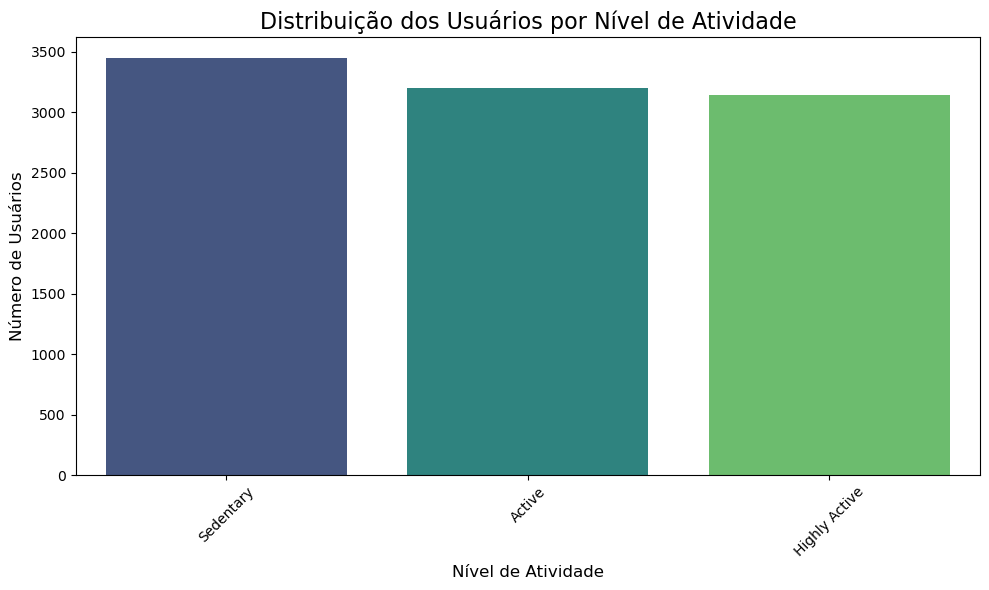

In [177]:
# Contar a frequência de cada nível de atividade
activity_distribution = smartwatch_final_df['Activity Level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_distribution.index, y=activity_distribution.values, palette="viridis")

plt.title("Distribuição dos Usuários por Nível de Atividade", fontsize=16)
plt.xlabel("Nível de Atividade", fontsize=12)
plt.ylabel("Número de Usuários", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

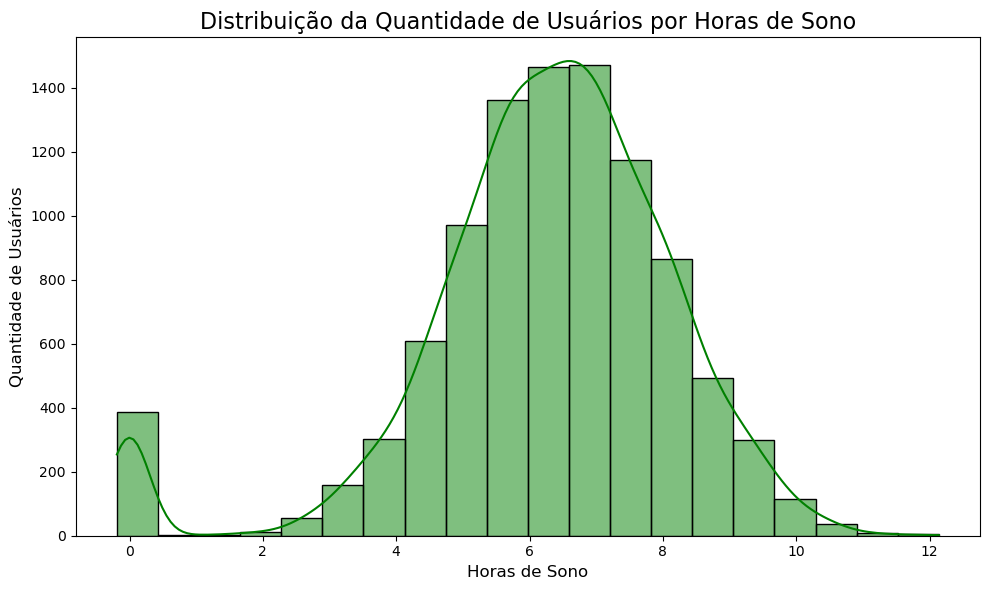

In [218]:
# a distribuição da quantidade de usuários por horas de sono
plt.figure(figsize=(10, 6))

sns.histplot(
    data=smartwatch_final_df,
    x='Sleep Duration (hours)',
    bins=20,  # Número de intervalos
    kde=True,  # Adicionar linha de densidade
    color='green'
)

plt.title("Distribuição da Quantidade de Usuários por Horas de Sono", fontsize=16)
plt.xlabel("Horas de Sono", fontsize=12)
plt.ylabel("Quantidade de Usuários", fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()

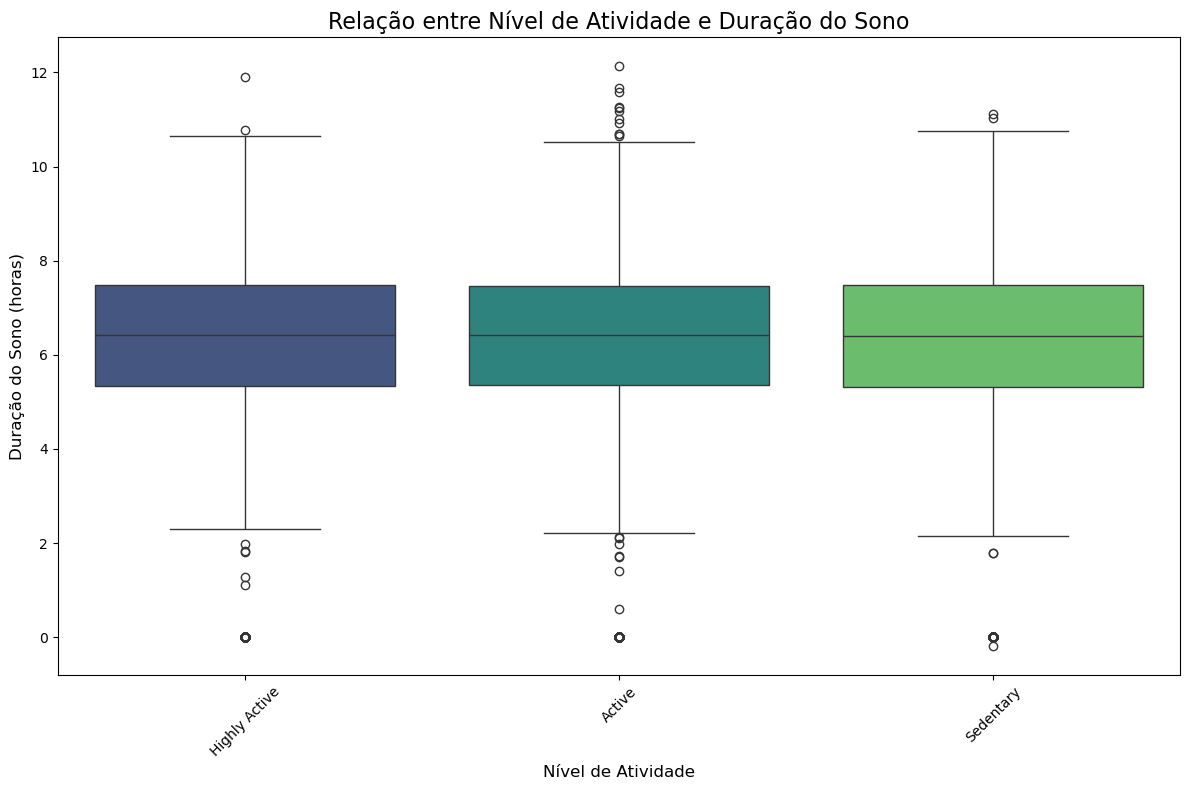

In [181]:
# boxplot para mostrar a relação entre nível de atividade e duração do sono
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=smartwatch_final_df,
    x='Activity Level',
    y='Sleep Duration (hours)',
    palette='viridis'
)

plt.title("Relação entre Nível de Atividade e Duração do Sono", fontsize=16)
plt.xlabel("Nível de Atividade", fontsize=12)
plt.ylabel("Duração do Sono (horas)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

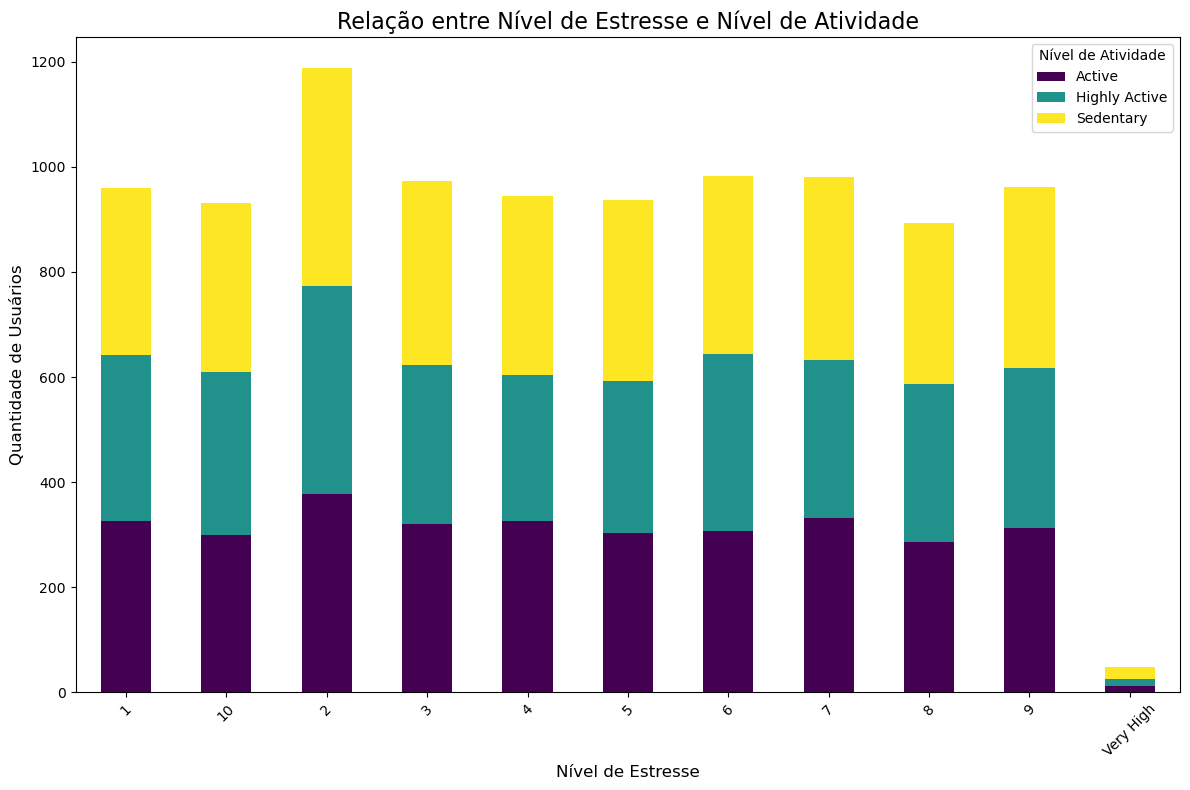

In [230]:
# tabela cruzada para contar os usuários por nível de estresse e nível de atividade
stress_activity_distribution = pd.crosstab(
    index=smartwatch_final_df['Stress Level'],
    columns=smartwatch_final_df['Activity Level']
)

stress_activity_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis'
)

plt.title("Relação entre Nível de Estresse e Nível de Atividade", fontsize=16)
plt.xlabel("Nível de Estresse", fontsize=12)
plt.ylabel("Quantidade de Usuários", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Nível de Atividade", fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

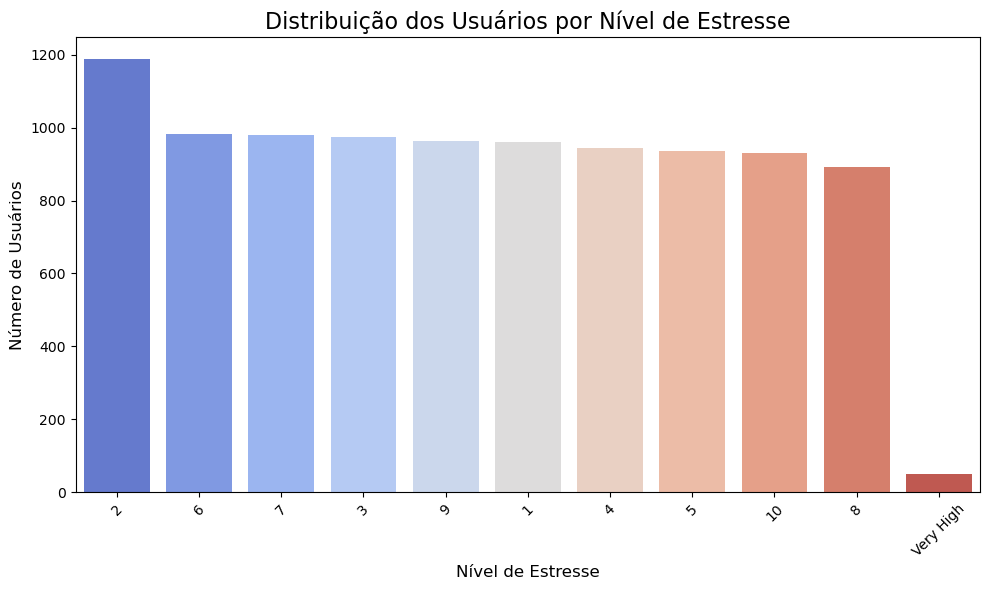

In [188]:
# Contar a frequência de cada nível de estresse
stress_distribution = smartwatch_final_df['Stress Level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=stress_distribution.index, y=stress_distribution.values, palette="coolwarm")

plt.title("Distribuição dos Usuários por Nível de Estresse", fontsize=16)
plt.xlabel("Nível de Estresse", fontsize=12)
plt.ylabel("Número de Usuários", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

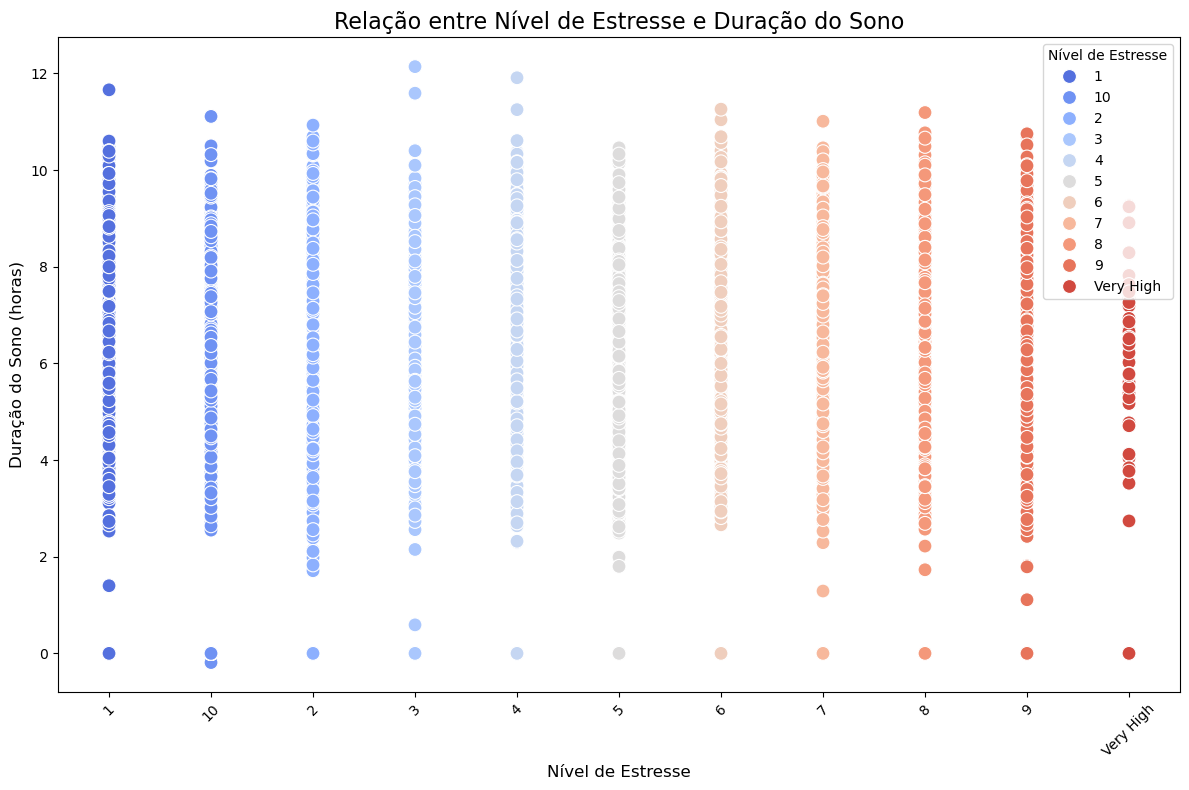

In [194]:
# Ordenar o nível de estresse em ordem crescente e apresentar a dispersão para mostrar a relação entre nível de estresse e duração do sono

smartwatch_final_df['Stress Level'] = pd.Categorical(
    smartwatch_final_df['Stress Level'], 
    categories=sorted(smartwatch_final_df['Stress Level'].unique()), 
    ordered=True
)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=smartwatch_final_df,
    x='Stress Level',
    y='Sleep Duration (hours)',
    hue='Stress Level', 
    palette='coolwarm',
    s=100  
)

plt.title("Relação entre Nível de Estresse e Duração do Sono", fontsize=16)
plt.xlabel("Nível de Estresse", fontsize=12)
plt.ylabel("Duração do Sono (horas)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Nível de Estresse", fontsize=10)
plt.tight_layout()

plt.show()

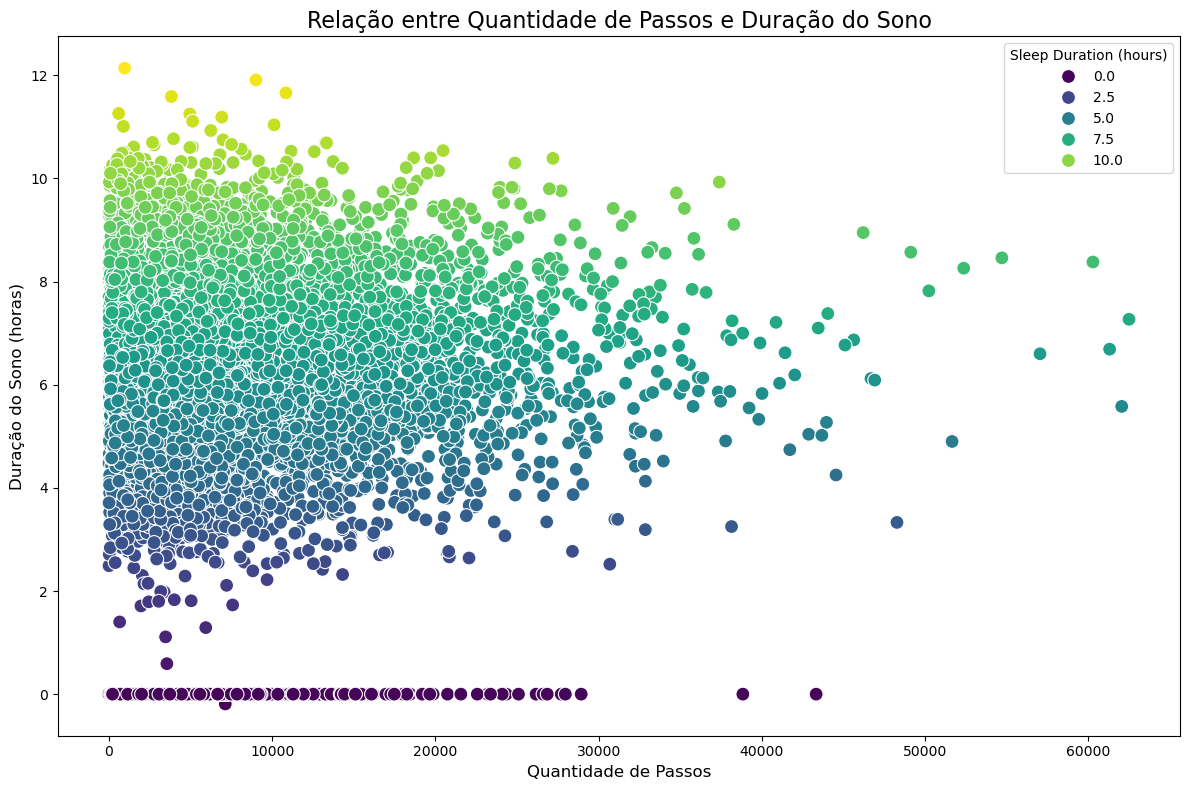

In [198]:
# gráfico de dispersão para mostrar a relação entre quantidade de passos e duração do sono
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=smartwatch_final_df,
    x='Step Count',
    y='Sleep Duration (hours)',
    hue='Sleep Duration (hours)',  
    palette='viridis',
    s=100  
)

plt.title("Relação entre Quantidade de Passos e Duração do Sono", fontsize=16)
plt.xlabel("Quantidade de Passos", fontsize=12)
plt.ylabel("Duração do Sono (horas)", fontsize=12)
plt.tight_layout()

plt.show()

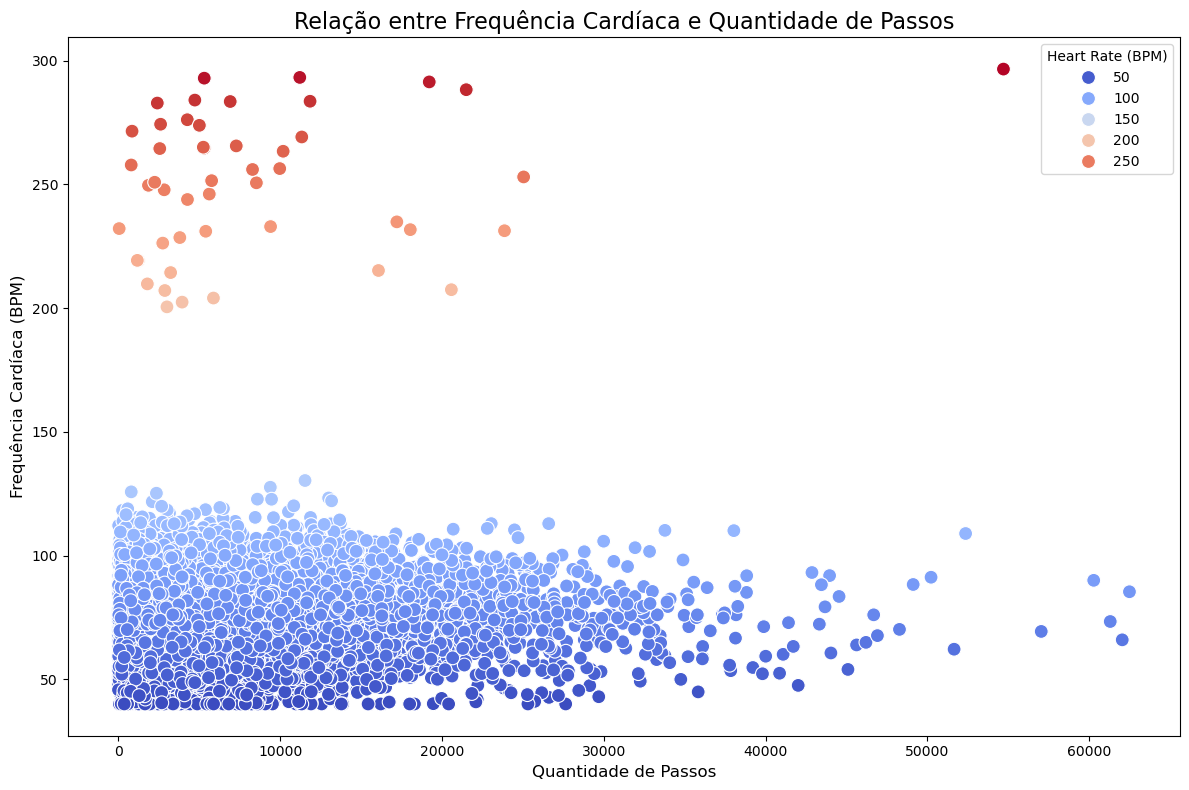

In [200]:
# gráfico de dispersão para mostrar a relação entre frequência cardíaca e quantidade de passos
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=smartwatch_final_df,
    x='Step Count',
    y='Heart Rate (BPM)',
    hue='Heart Rate (BPM)',  
    palette='coolwarm',
    s=100  
)

plt.title("Relação entre Frequência Cardíaca e Quantidade de Passos", fontsize=16)
plt.xlabel("Quantidade de Passos", fontsize=12)
plt.ylabel("Frequência Cardíaca (BPM)", fontsize=12)
plt.tight_layout()

plt.show()